In [17]:
import pandas as pd
import numpy as np

# Load the clinical data (corrected path)
df = pd.read_csv('../Raw Data/CPTAC-3.clinical.tsv', sep='\t')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Total number of samples: {len(df)}")
print("\nFirst few rows:")
df.head()

Dataset shape: (2861, 124)
Total number of samples: 2861

First few rows:


,sample,id,days_to_lost_to_followup,disease_type,case_id,days_to_consent,consent_type,lost_to_followup,submitter_id,primary_site,...,oct_embedded.samples,biospecimen_anatomic_site.samples,specimen_type.samples,biospecimen_laterality.samples,days_to_sample_procurement.samples,longest_dimension.samples,current_weight.samples,is_ffpe.samples,tissue_type.samples,sample_ordinal.samples
0,C3L-01052-02,a5fa1602-d98b-4953-b549-902ec3f4cdcb,NaN,Ductal and Lobular Neoplasms,a5fa1602-d98b-4953-b549-902ec3f4cdcb,24.0,Informed Consent,NaN,C3L-01052,Pancreas,...,No,Pancreas,Solid Tissue,NaN,27.0,NaN,NaN,False,Tumor,2.0
1,C3L-01052-04,a5fa1602-d98b-4953-b549-902ec3f4cdcb,NaN,Ductal and Lobular Neoplasms,a5fa1602-d98b-4953-b549-902ec3f4cdcb,24.0,Informed Consent,NaN,C3L-01052,Pancreas,...,No,Pancreas,Solid Tissue,NaN,27.0,NaN,NaN,False,Normal,1.0
2,C3L-01043-01,206f20bb-c212-4a26-967a-5b3700f322be,NaN,Gliomas,206f20bb-c212-4a26-967a-5b3700f322be,1.0,Informed Consent,NaN,C3L-01043,Brain,...,No,Brain,Solid Tissue,Left,3.0,NaN,NaN,False,Tumor,1.0
3,C3L-01459-01,a2f31483-07f9-4672-966b-11c329f915c3,NaN,Adenomas and Adenocarcinomas,a2f31483-07f9-4672-966b-11c329f915c3,-13.0,Informed Consent,NaN,C3L-01459,Kidney,...,No,Kidney,Solid Tissue,Right,0.0,NaN,0.21,False,Tumor,1.0
4,C3L-00589-06,4a40e29b-aaa0-4de4-949e-e4a5d6295bed,NaN,Ductal and Lobular Neoplasms,4a40e29b-aaa0-4de4-949e-e4a5d6295bed,0.0,Informed Consent,NaN,C3L-00589,Pancreas,...,No,Pancreas,Solid Tissue,NaN,0.0,NaN,NaN,False,Normal,1.0


In [18]:
# Check the unique values in the tissue_type.samples column
print("Unique values in 'tissue_type.samples' column:")
print(df['tissue_type.samples'].value_counts())
print(f"\nNumber of unique values: {df['tissue_type.samples'].nunique()}")

Unique values in 'tissue_type.samples' column:
tissue_type.samples
Tumor     2113
Normal     748
Name: count, dtype: int64

Number of unique values: 2


In [19]:
# Filter samples where tissue_type.samples is 'Normal'
normal_samples = df[df['tissue_type.samples'] == 'Normal']

print(f"Number of normal samples: {len(normal_samples)}")
print(f"Percentage of normal samples: {len(normal_samples)/len(df)*100:.2f}%")

# Display the first few normal samples
print("\nFirst 5 normal samples:")
normal_samples.head()

Number of normal samples: 748
Percentage of normal samples: 26.14%

First 5 normal samples:


,sample,id,days_to_lost_to_followup,disease_type,case_id,days_to_consent,consent_type,lost_to_followup,submitter_id,primary_site,...,oct_embedded.samples,biospecimen_anatomic_site.samples,specimen_type.samples,biospecimen_laterality.samples,days_to_sample_procurement.samples,longest_dimension.samples,current_weight.samples,is_ffpe.samples,tissue_type.samples,sample_ordinal.samples
1,C3L-01052-04,a5fa1602-d98b-4953-b549-902ec3f4cdcb,NaN,Ductal and Lobular Neoplasms,a5fa1602-d98b-4953-b549-902ec3f4cdcb,24.0,Informed Consent,NaN,C3L-01052,Pancreas,...,No,Pancreas,Solid Tissue,NaN,27.0,NaN,NaN,False,Normal,1.0
4,C3L-00589-06,4a40e29b-aaa0-4de4-949e-e4a5d6295bed,NaN,Ductal and Lobular Neoplasms,4a40e29b-aaa0-4de4-949e-e4a5d6295bed,0.0,Informed Consent,NaN,C3L-00589,Pancreas,...,No,Pancreas,Solid Tissue,NaN,0.0,NaN,NaN,False,Normal,1.0
15,C3L-00928-06,5ea1361a-050d-4fa0-be59-b530c456b6e3,NaN,Ductal and Lobular Neoplasms,5ea1361a-050d-4fa0-be59-b530c456b6e3,0.0,Informed Consent,NaN,C3L-00928,Pancreas,...,No,Pancreas,Solid Tissue,NaN,0.0,NaN,NaN,False,Normal,1.0
20,C3L-00017-04,d0a4a77b-3676-490b-9058-22509098cb27,NaN,Ductal and Lobular Neoplasms,d0a4a77b-3676-490b-9058-22509098cb27,0.0,Informed Consent,NaN,C3L-00017,Pancreas,...,Yes,Pancreas,Solid Tissue,NaN,0.0,NaN,NaN,False,Normal,1.0
28,C3N-01526-06,793fc068-7121-43e1-aab4-d9e4c4459422,NaN,Adenomas and Adenocarcinomas,793fc068-7121-43e1-aab4-d9e4c4459422,0.0,Informed Consent,NaN,C3N-01526,"Uterus, NOS",...,No,Uterus,Solid Tissue,NaN,0.0,NaN,NaN,False,Normal,1.0


In [20]:
# Save the filtered normal samples to the structured outputs folder
normal_samples.to_csv('../outputs/data/CPTAC-3_normal_samples.tsv', sep='\t', index=False)
print("Normal samples saved to '../outputs/data/CPTAC-3_normal_samples.tsv'")

# Display some key information about the normal samples
print(f"\nSample IDs of normal samples:")
print(normal_samples['sample'].tolist()[:10])  # Show first 10 to avoid too much output
if len(normal_samples) > 10:
    print(f"... and {len(normal_samples) - 10} more samples")

Normal samples saved to '../outputs/data/CPTAC-3_normal_samples.tsv'

Sample IDs of normal samples:
['C3L-01052-04', 'C3L-00589-06', 'C3L-00928-06', 'C3L-00017-04', 'C3N-01526-06', 'C3N-01525-06', 'C3L-00966-07', 'C3L-01639-06', 'C3L-01967-06', 'C3N-01019-06']
... and 738 more samples


In [21]:
# Load TCGA data as well
print("="*50)
print("LOADING TCGA DATA")
print("="*50)

# Load the TCGA phenotype data (corrected path)
tcga_df = pd.read_csv('../Raw Data/GDC-PANCAN.TCGA_phenotype.tsv', sep='\t')

# Display basic information about the TCGA dataset
print(f"TCGA Dataset shape: {tcga_df.shape}")
print(f"Total number of TCGA samples: {len(tcga_df)}")
print("\nFirst few rows of TCGA data:")
tcga_df.head()

LOADING TCGA DATA
TCGA Dataset shape: (14318, 58)
Total number of TCGA samples: 14318

First few rows of TCGA data:


,sample,demographic.age_at_index,demographic.created_datetime,demographic.days_to_birth,demographic.days_to_death,demographic.demographic_id,demographic.ethnicity,demographic.gender,demographic.race,demographic.state,...,exposures.years_smoked,id,project.name,project.project_id,tissue_source_site.name,samples.is_ffpe,samples.sample_id,samples.sample_type,samples.sample_type_id,samples.tissue_type
0,TCGA-AX-A064-01A,81.0,NaN,-29625.0,NaN,7a2e57b2-e19b-5407-967c-2f076d5ee7fc,not reported,female,white,released,...,NaN,633e6994-3e8b-4c0b-9b79-06cf4ab6f9bc,Uterine Corpus Endometrial Carcinoma,TCGA-UCEC,Gynecologic Oncology Group,False,3d85e546-d9f4-49ba-adbd-301118cd1307,Primary Tumor,1,Not Reported
1,TCGA-AP-A0L8-01A,70.0,NaN,-25733.0,1484.0,dc7a4a86-4e5d-5763-939f-1ef9f9df5bf5,not reported,female,black or african american,released,...,NaN,9aa8c2b4-db32-4899-bf0c-d578cb175e90,Uterine Corpus Endometrial Carcinoma,TCGA-UCEC,MSKCC,False,d1a7a58f-7a35-4a94-a337-051ae56ded00,Primary Tumor,1,Not Reported
2,TCGA-D1-A177-01A,70.0,NaN,-25602.0,NaN,dd1d384b-f3e5-53cb-b3e1-cff1a4d84850,not hispanic or latino,female,white,released,...,NaN,e8c58d8b-51d7-4599-af79-469ee6f269db,Uterine Corpus Endometrial Carcinoma,TCGA-UCEC,Mayo Clinic,False,97587fd4-0f6f-4af5-ac0a-7328abb40e9c,Primary Tumor,1,Not Reported
3,TCGA-FL-A1YU-11A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,a94de778-9c21-410d-8b9d-0f9240036bb8,Uterine Corpus Endometrial Carcinoma,TCGA-UCEC,University of Hawaii - Normal Study,False,b28c3b96-d5a6-4209-831f-5e1f0277d825,Solid Tissue Normal,11,Not Reported
4,TCGA-FI-A2EY-01A,63.0,NaN,-23042.0,880.0,631fe89e-04fb-56a0-ab68-80e604dfdaac,not hispanic or latino,female,white,released,...,NaN,787c3e2f-a708-4985-a5b1-b2383c7bfc52,Uterine Corpus Endometrial Carcinoma,TCGA-UCEC,Washington University,False,8c8e5dd2-b8ef-4e5c-9cd6-7d3717e4cdef,Primary Tumor,1,Not Reported


In [22]:
# Check the unique values in the TCGA samples.sample_type column
print("Unique values in TCGA 'samples.sample_type' column:")
print(tcga_df['samples.sample_type'].value_counts())
print(f"\nNumber of unique values in TCGA: {tcga_df['samples.sample_type'].nunique()}")

# Also check if there are other tissue-related columns
tissue_columns = [col for col in tcga_df.columns if 'tissue' in col.lower()]
print(f"\nTissue-related columns in TCGA data: {tissue_columns}")

Unique values in TCGA 'samples.sample_type' column:
samples.sample_type
Primary Tumor                                      10787
Solid Tissue Normal                                 2684
Metastatic                                           396
Primary Blood Derived Cancer - Peripheral Blood      356
Recurrent Tumor                                       63
Additional - New Primary                              11
FFPE Scrolls                                          10
Buccal Cell Normal                                     5
Bone Marrow Normal                                     4
Additional Metastatic                                  2
Name: count, dtype: int64

Number of unique values in TCGA: 10

Tissue-related columns in TCGA data: ['diagnoses.tissue_or_organ_of_origin', 'tissue_source_site.name', 'samples.tissue_type']


In [23]:
# Filter TCGA samples where samples.sample_type is 'Solid Tissue Normal'
tcga_normal_samples = tcga_df[tcga_df['samples.sample_type'] == 'Solid Tissue Normal']

print(f"Number of TCGA normal samples: {len(tcga_normal_samples)}")
print(f"Percentage of TCGA normal samples: {len(tcga_normal_samples)/len(tcga_df)*100:.2f}%")

# Display the first few TCGA normal samples
print("\nFirst 5 TCGA normal samples:")
tcga_normal_samples.head()

Number of TCGA normal samples: 2684
Percentage of TCGA normal samples: 18.75%

First 5 TCGA normal samples:


,sample,demographic.age_at_index,demographic.created_datetime,demographic.days_to_birth,demographic.days_to_death,demographic.demographic_id,demographic.ethnicity,demographic.gender,demographic.race,demographic.state,...,exposures.years_smoked,id,project.name,project.project_id,tissue_source_site.name,samples.is_ffpe,samples.sample_id,samples.sample_type,samples.sample_type_id,samples.tissue_type
3,TCGA-FL-A1YU-11A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,a94de778-9c21-410d-8b9d-0f9240036bb8,Uterine Corpus Endometrial Carcinoma,TCGA-UCEC,University of Hawaii - Normal Study,False,b28c3b96-d5a6-4209-831f-5e1f0277d825,Solid Tissue Normal,11,Not Reported
17,TCGA-EO-A22T-11A,56.0,NaN,-20608.0,NaN,255807e2-d413-5f0e-8244-0047a41ee5fe,not hispanic or latino,female,asian,released,...,NaN,63170b0e-78cf-45d9-af9d-ce986ac66991,Uterine Corpus Endometrial Carcinoma,TCGA-UCEC,University Health Network,False,9695d28b-ca9d-42c9-bfef-9d234e257b05,Solid Tissue Normal,11,Not Reported
29,TCGA-PG-A917-11A,74.0,NaN,-27104.0,NaN,6a5c27c8-b7e0-5ef7-8113-fd24e5e1a494,not hispanic or latino,female,black or african american,released,...,NaN,b1b9173c-b370-4fe5-a263-c807e8a9709c,Uterine Corpus Endometrial Carcinoma,TCGA-UCEC,Montefiore Medical Center,False,0d601f13-ef0f-4b52-b3d0-5f4fb0d62b3a,Solid Tissue Normal,11,Not Reported
62,TCGA-BG-A0MA-11A,60.0,NaN,-22036.0,326.0,5d06e636-7e27-5d5a-8bc0-dce45ba5fa01,not hispanic or latino,female,white,released,...,NaN,f85bc60b-ab07-4b24-820b-6860b198e910,Uterine Corpus Endometrial Carcinoma,TCGA-UCEC,University of Pittsburgh,False,ccc915fc-752a-44d0-8cff-0d1e7b58c280,Solid Tissue Normal,11,Not Reported
75,TCGA-AJ-A3NH-11A,90.0,NaN,-32871.0,1.0,5260b2a3-c911-50eb-a9f3-7ab433a02860,not hispanic or latino,female,white,released,...,NaN,7186180a-688a-4fcc-9a67-166eff032e4b,Uterine Corpus Endometrial Carcinoma,TCGA-UCEC,International Genomics Conosrtium,False,6985142f-a646-4b89-a60b-0801a3820bbd,Solid Tissue Normal,11,Not Reported


In [24]:
# Save the filtered TCGA normal samples to the structured outputs folder
tcga_normal_samples.to_csv('../outputs/data/TCGA_normal_samples.tsv', sep='\t', index=False)
print("TCGA normal samples saved to '../outputs/data/TCGA_normal_samples.tsv'")

# Display some key information about the TCGA normal samples
print(f"\nSample IDs of TCGA normal samples:")
print(tcga_normal_samples['sample'].tolist()[:10])  # Show first 10 to avoid too much output
if len(tcga_normal_samples) > 10:
    print(f"... and {len(tcga_normal_samples) - 10} more samples")

TCGA normal samples saved to '../outputs/data/TCGA_normal_samples.tsv'

Sample IDs of TCGA normal samples:
['TCGA-FL-A1YU-11A', 'TCGA-EO-A22T-11A', 'TCGA-PG-A917-11A', 'TCGA-BG-A0MA-11A', 'TCGA-AJ-A3NH-11A', 'TCGA-FL-A1YI-11A', 'TCGA-AX-A1CK-11A', 'TCGA-FL-A1YV-11A', 'TCGA-AJ-A3EM-11A', 'TCGA-FL-A1YM-11A']
... and 2674 more samples


In [25]:
# Summary comparison between CPTAC-3 and TCGA normal samples
print("="*60)
print("SUMMARY: CPTAC-3 vs TCGA NORMAL SAMPLES")
print("="*60)

print(f"CPTAC-3 normal samples: {len(normal_samples)}")
print(f"TCGA normal samples: {len(tcga_normal_samples)}")
print(f"Total normal samples: {len(normal_samples) + len(tcga_normal_samples)}")

print(f"\nCPTAC-3 percentage: {len(normal_samples)/(len(normal_samples) + len(tcga_normal_samples))*100:.1f}%")
print(f"TCGA percentage: {len(tcga_normal_samples)/(len(normal_samples) + len(tcga_normal_samples))*100:.1f}%")

# Check if both datasets have the same column structure
print(f"\nCPTAC-3 columns: {len(normal_samples.columns)}")
print(f"TCGA columns: {len(tcga_normal_samples.columns)}")
print(f"Common columns: {len(set(normal_samples.columns) & set(tcga_normal_samples.columns))}")

common_cols = list(set(normal_samples.columns) & set(tcga_normal_samples.columns))
print(f"\nFirst 10 common columns: {common_cols[:10]}")

# Save summary analysis to analysis folder
summary_data = {
    'Dataset': ['CPTAC-3', 'TCGA', 'Total'],
    'Normal_Samples': [len(normal_samples), len(tcga_normal_samples), len(normal_samples) + len(tcga_normal_samples)],
    'Total_Columns': [len(normal_samples.columns), len(tcga_normal_samples.columns), len(common_cols)],
    'Percentage': [len(normal_samples)/(len(normal_samples) + len(tcga_normal_samples))*100, 
                  len(tcga_normal_samples)/(len(normal_samples) + len(tcga_normal_samples))*100, 100.0]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('../outputs/analysis/dataset_summary.csv', index=False)
print(f"\nDataset summary saved to '../outputs/analysis/dataset_summary.csv'")

SUMMARY: CPTAC-3 vs TCGA NORMAL SAMPLES
CPTAC-3 normal samples: 748
TCGA normal samples: 2684
Total normal samples: 3432

CPTAC-3 percentage: 21.8%
TCGA percentage: 78.2%

CPTAC-3 columns: 124
TCGA columns: 58
Common columns: 2

First 10 common columns: ['id', 'sample']

Dataset summary saved to '../outputs/analysis/dataset_summary.csv'


In [27]:
# Since R is not available, let's do some basic analysis with Python
import matplotlib.pyplot as plt

# Set up plotting style
plt.style.use('default')

print("="*60)
print("PYTHON-BASED ANALYSIS (R ALTERNATIVE)")
print("="*60)

PYTHON-BASED ANALYSIS (R ALTERNATIVE)


In [28]:
# Age analysis for both datasets
print("📊 AGE ANALYSIS")
print("-" * 40)

# Extract age information from both datasets
cptac_ages = normal_samples['age_at_index.demographic'].dropna()
tcga_ages = tcga_normal_samples['demographic.age_at_index'].dropna()

print(f"CPTAC-3 samples with age data: {len(cptac_ages)}")
print(f"TCGA samples with age data: {len(tcga_ages)}")

if len(cptac_ages) > 0:
    print(f"\nCPTAC-3 Age Statistics:")
    print(f"  Mean: {cptac_ages.mean():.1f} years")
    print(f"  Median: {cptac_ages.median():.1f} years")
    print(f"  Range: {cptac_ages.min():.0f} - {cptac_ages.max():.0f} years")

if len(tcga_ages) > 0:
    print(f"\nTCGA Age Statistics:")
    print(f"  Mean: {tcga_ages.mean():.1f} years")
    print(f"  Median: {tcga_ages.median():.1f} years")
    print(f"  Range: {tcga_ages.min():.0f} - {tcga_ages.max():.0f} years")

📊 AGE ANALYSIS
----------------------------------------
CPTAC-3 samples with age data: 9
TCGA samples with age data: 2586

CPTAC-3 Age Statistics:
  Mean: 59.2 years
  Median: 59.0 years
  Range: 43 - 68 years

TCGA Age Statistics:
  Mean: 61.4 years
  Median: 63.0 years
  Range: 15 - 90 years



📈 CREATING AGE DISTRIBUTION PLOTS


/var/folders/pz/lfvpvb6d2wbdsny70113by7w0000gn/T/ipykernel_29067/623125420.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(box_data, labels=labels, patch_artist=True)


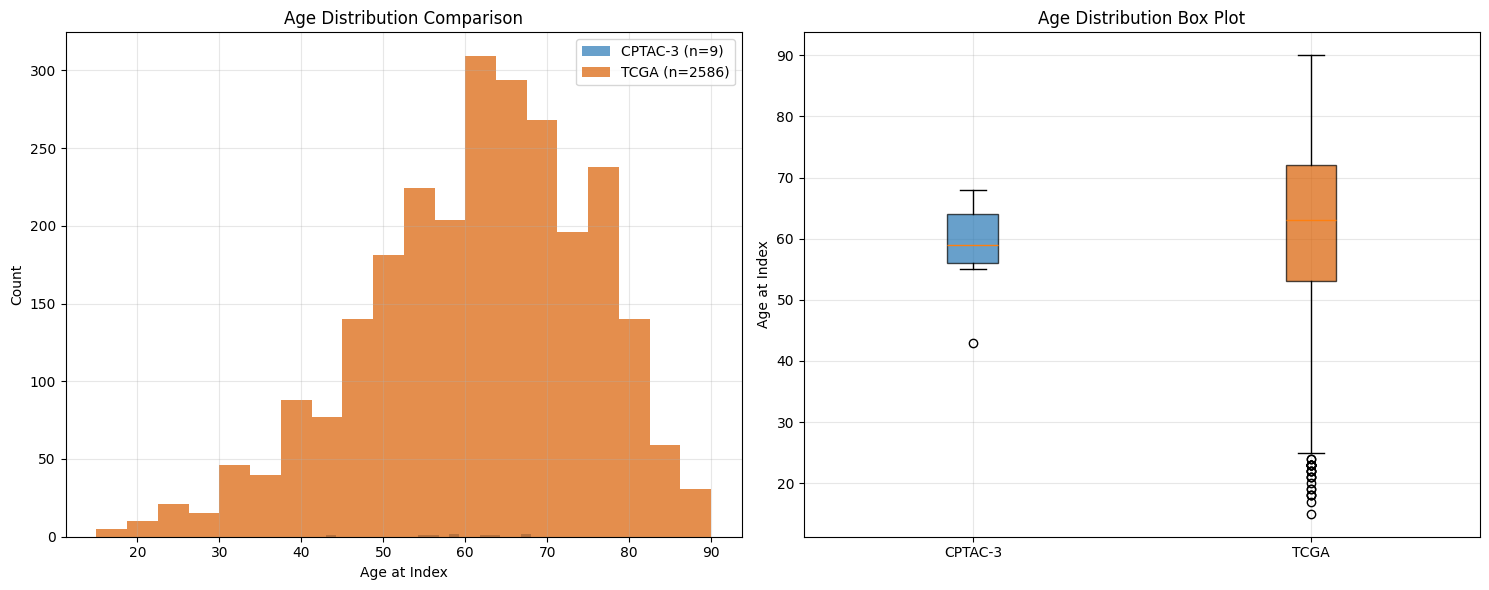

In [31]:
# Create age distribution visualization if we have age data
if len(cptac_ages) > 0 and len(tcga_ages) > 0:
    print("\n📈 CREATING AGE DISTRIBUTION PLOTS")
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Age distribution histogram
    ax1.hist(cptac_ages, bins=20, alpha=0.7, label=f'CPTAC-3 (n={len(cptac_ages)})', color='#2878B5')
    ax1.hist(tcga_ages, bins=20, alpha=0.7, label=f'TCGA (n={len(tcga_ages)})', color='#D95F02')
    ax1.set_xlabel('Age at Index')
    ax1.set_ylabel('Count')
    ax1.set_title('Age Distribution Comparison')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Box plot comparison
    box_data = [cptac_ages, tcga_ages]
    labels = ['CPTAC-3', 'TCGA']
    colors = ['#2878B5', '#D95F02']
    
    bp = ax2.boxplot(box_data, labels=labels, patch_artist=True)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax2.set_ylabel('Age at Index')
    ax2.set_title('Age Distribution Box Plot')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()

    plt.show()
    
    
elif len(cptac_ages) == 0 and len(tcga_ages) == 0:
    print("❌ No age data available in either dataset")
else:
    print(f"⚠️  Age data only available in {'CPTAC-3' if len(cptac_ages) > 0 else 'TCGA'}")

In [32]:
# Additional dataset characteristics analysis
print("\n🔍 DATASET CHARACTERISTICS")
print("-" * 40)

# Analyze project/cancer types
print("Cancer Types in TCGA:")
tcga_projects = tcga_normal_samples['project.project_id'].value_counts()
print(tcga_projects.head(10))

print(f"\nTotal cancer types in TCGA: {tcga_projects.nunique()}")

# Gender distribution if available
if 'demographic.gender' in tcga_normal_samples.columns:
    tcga_gender = tcga_normal_samples['demographic.gender'].value_counts()
    print(f"\nTCGA Gender Distribution:")
    for gender, count in tcga_gender.items():
        if pd.notna(gender):
            print(f"  {gender}: {count} ({count/len(tcga_normal_samples)*100:.1f}%)")

# Save comprehensive analysis results
analysis_results = {
    'Dataset': ['CPTAC-3', 'TCGA'],
    'Total_Normal_Samples': [len(normal_samples), len(tcga_normal_samples)],
    'Samples_with_Age': [len(cptac_ages), len(tcga_ages)],
    'Mean_Age': [cptac_ages.mean() if len(cptac_ages) > 0 else None, 
                 tcga_ages.mean() if len(tcga_ages) > 0 else None],
    'Age_Range_Min': [cptac_ages.min() if len(cptac_ages) > 0 else None,
                      tcga_ages.min() if len(tcga_ages) > 0 else None],
    'Age_Range_Max': [cptac_ages.max() if len(cptac_ages) > 0 else None,
                      tcga_ages.max() if len(tcga_ages) > 0 else None]
}

detailed_analysis_df = pd.DataFrame(analysis_results)


🔍 DATASET CHARACTERISTICS
----------------------------------------
Cancer Types in TCGA:
project.project_id
TCGA-KIRC    442
TCGA-LAML    340
TCGA-LUAD    274
TCGA-LUSC    254
TCGA-BRCA    162
TCGA-OV      135
TCGA-PRAD    118
TCGA-STAD    101
TCGA-THCA    100
TCGA-COAD     93
Name: count, dtype: int64

Total cancer types in TCGA: 27

TCGA Gender Distribution:
  male: 1369 (51.0%)
  female: 1220 (45.5%)
  not reported: 1 (0.0%)
